In [1]:
import pandas as pd
import sys
import os
import config # 自定义配置文件
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# 不显示VisibleDeprecation警告
import warnings
warnings.filterwarnings("ignore", category=Warning)

# 绘图显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import pickle

from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv(config.AF_Data_path + "AFAfter.csv")

In [3]:
col_list = ["Education","age","gender"]

### 目标数据可视化

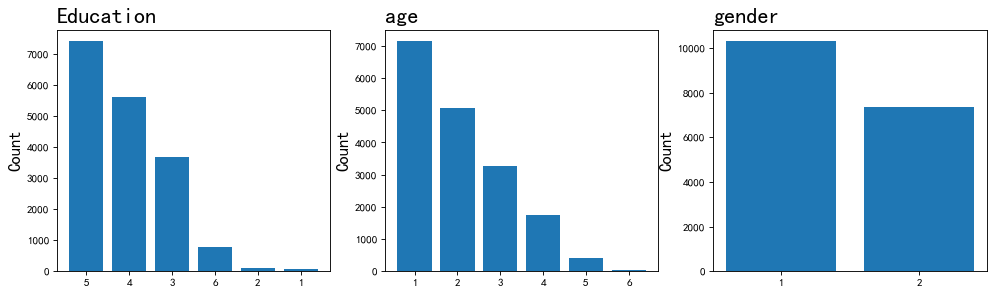

In [4]:
plt.figure(figsize=(15,4), dpi=80) # 创建画布
for i in range(len(col_list)):
    plt.subplot(1, 3, i+1) # 选中1行3列中的第1个绘图区
    plt.title(col_list[i], loc='left',fontsize=20) # 设置title
    plt.ylabel('Count',fontsize=15) # Y轴title
    #绘图--竖图
    plt.bar(range(len(data[col_list[i]].value_counts().values)), 
            data[col_list[i]].value_counts().values)#竖图-width设置线条宽度
    #x轴坐标
    plt.xticks(range(len(data[col_list[i]].value_counts().index)), 
               data[col_list[i]].value_counts().index)
plt.show()

### AF数据可视化

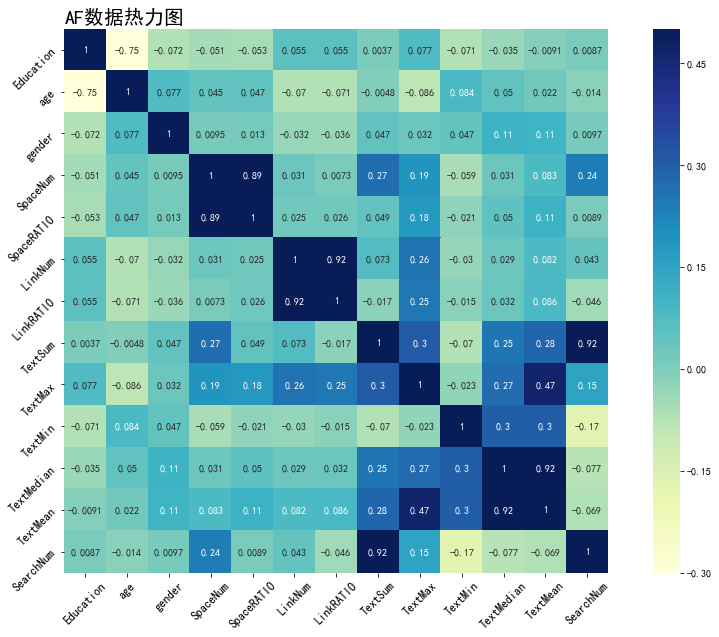

In [5]:
ax = plt.subplots(figsize=(16,10))
plt.title("AF数据热力图", loc='left',fontsize=20) # 设置title
ax = sns.heatmap(data.corr(),
                 vmin=-0.3,vmax=0.5,           #刻度阈值
                 annot=True,
                 square=True,
                 cmap="YlGnBu"
                )
#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)
plt.show() # 渲染

### 降维可视化

In [2]:
# 文件持久化
def dump_pkl(dump_data,dump_name):
    # 保存数据文件
    pkl_file = open(config.WV_Data_path + dump_name + '.feat','wb')
    pickle.dump(dump_data,pkl_file)
    pkl_file.close()

In [3]:
def load_pkl(pkl_name):
    # 加载文件
    pkl_file = open(config.WV_Data_path + pkl_name + '.feat','rb')
    load_data = pickle.load(pkl_file)
    pkl_file.close()
    return load_data

### TFIDF

In [4]:
# 加载词向量数据
TFIDF_sp = load_pkl("TFIDF_sp")
TFIDF_HW_sp = load_pkl("TFIDF_HW_sp")

In [5]:
tsne = TSNE() # T-sne实例化

In [17]:
TFIDF_HW_tsne = tsne.fit_transform(TFIDF_HW_sp.toarray()) # HW词向量降维

In [ ]:
TFIDF_X_sp_tsne = tsne.fit_transform(TFIDF_sp.toarray()) # 词向量降维

In [ ]:
TFIDF_X_sp_tsne.shape

In [ ]:
# 存储降维数据
dump_pkl(X_sp_tsne,"TFIDF_X_sp_tsne")
# dump_pkl(HW_tsne,"TFIDF_HW_tsne")

In [30]:
# 加载降维数据
TFIDF_X_sp_tsne = load_pkl("TFIDF_X_sp_tsne")
TFIDF_HW_tsne = load_pkl("TFIDF_HW_tsne")

In [ ]:
# 生成可视化DF数据据
DF = pd.DataFrame()
# DF["TFIDF_HW_tsne_x"] = TFIDF_HW_tsne[:,0]
# DF["TFIDF_HW_tsne_y"] = TFIDF_HW_tsne[:,1]

DF["TFIDF_X_sp_tsne_x"] = TFIDF_X_sp_tsne[:,0]
DF["TFIDF_X_sp_tsne_y"] = TFIDF_X_sp_tsne[:,1]

DF["Education"] = data["Education"]
DF["age"] = data["age"]
DF["gender"] = data["gender"]

#### TFIDF_HW-Tsne散点图

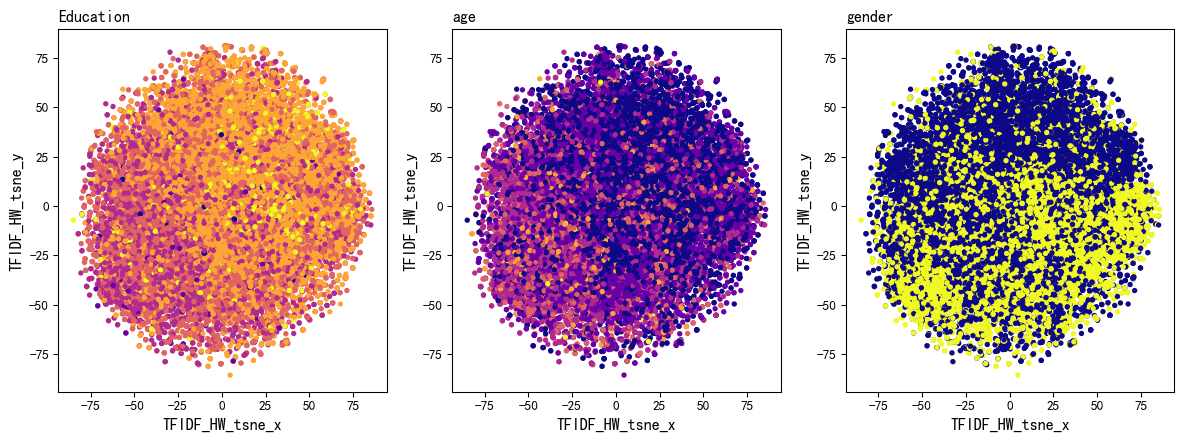

In [32]:
dpi = 96
plt.subplots(figsize=((480/dpi)*3,480/dpi), dpi=dpi) # 创建画布
for i in range(len(col_list)):
    plt.subplot(1, 3, i+1) # 选中1行3列中的第3个绘图区
    plt.title(col_list[i], loc='left',fontsize=12) # 设置title
    plt.xlabel('TFIDF_HW_tsne_x',fontsize=12) # X轴title
    plt.ylabel('TFIDF_HW_tsne_y',fontsize=12) # Y轴title
    plt.scatter('TFIDF_HW_tsne_x', 'TFIDF_HW_tsne_y', data=DF,c=col_list[i],marker='.',cmap='plasma')
plt.show() # 渲染

#### TFIDF-Tsne散点图

### Word2Vec

In [38]:
# 加载词向量数据
W2V_X_sp = load_pkl("W2V_X_sp")
W2V_HW_sp = load_pkl("W2V_HW_sp")

In [17]:
W2V_X_sp_tsne = tsne.fit_transform(W2V_X_sp.toarray()) # 词向量降维
W2V_HW_tsne = tsne.fit_transform(W2V_HW_sp.toarray()) # HW词向量降维

In [33]:
# 存储降维数据
dump_pkl(W2V_X_sp_tsne,"W2V_X_sp_tsne")
dump_pkl(W2V_HW_tsne,"W2V_HW_tsne")

In [39]:
# 加载降维数据
W2V_X_sp_tsne = load_pkl("W2V_X_sp_tsne")
W2V_HW_tsne = load_pkl("W2V_HW_tsne")

In [34]:
# 可视化DF对象新增列
DF["W2V_X_sp_tsne_x"] = W2V_X_sp_tsne[:,0]
DF["W2V_X_sp_tsne_y"] = W2V_X_sp_tsne[:,1]

DF["W2V_HW_tsne_x"] = W2V_HW_tsne[:,0]
DF["W2V_HW_tsne_y"] = W2V_HW_tsne[:,1]

#### W2V_HW-Tsne散点图

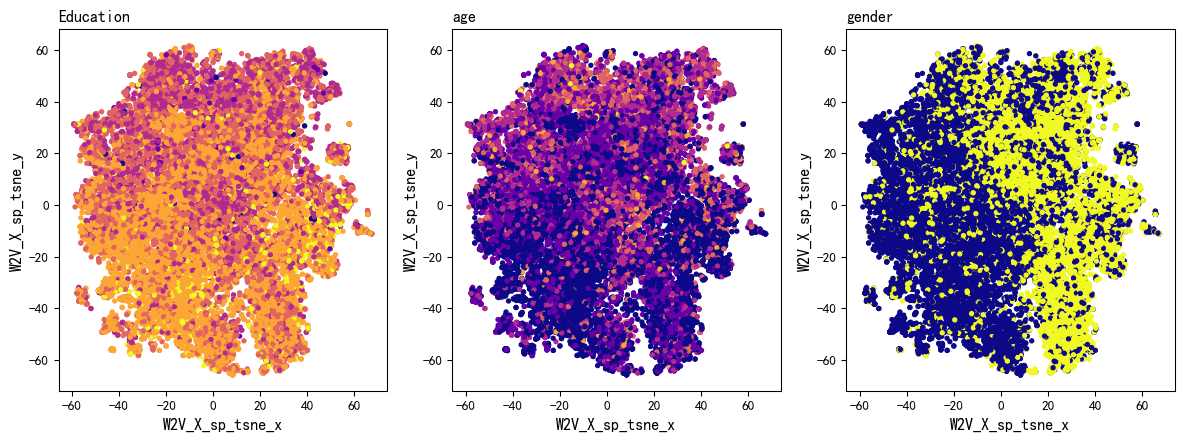

In [35]:
plt.subplots(figsize=((480/dpi)*3,480/dpi), dpi=dpi) # 创建画布
for i in range(len(col_list)):
    plt.subplot(1, 3, i+1) # 选中1行3列中的第3个绘图区
    plt.title(col_list[i], loc='left',fontsize=12) # 设置title
    plt.xlabel('W2V_X_sp_tsne_x',fontsize=12) # X轴title
    plt.ylabel('W2V_X_sp_tsne_y',fontsize=12) # Y轴title
    plt.scatter('W2V_X_sp_tsne_x', 'W2V_X_sp_tsne_y', data=DF,c=col_list[i],marker='.',cmap='plasma')
plt.show() # 渲染

#### W2V-Tsne散点图

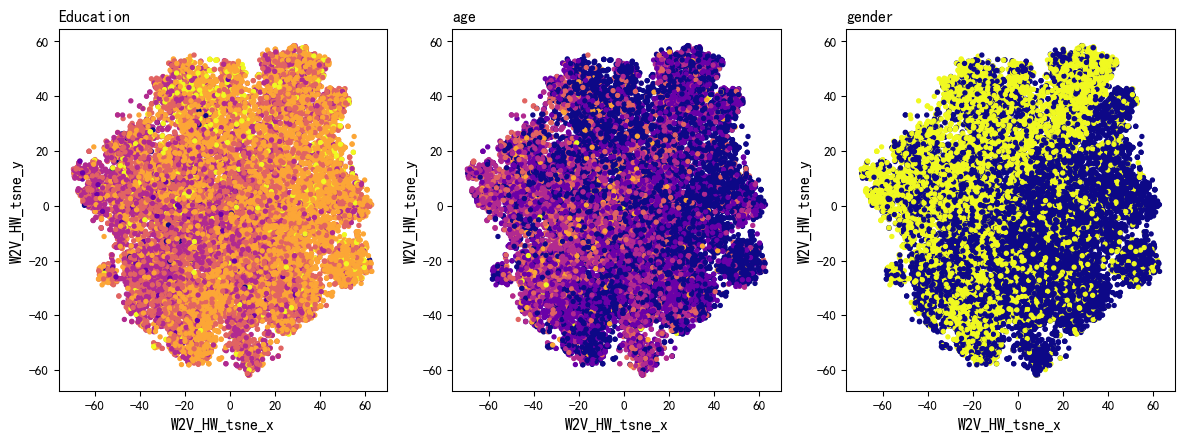

In [36]:
plt.subplots(figsize=((480/dpi)*3,480/dpi), dpi=dpi) # 创建画布
for i in range(len(col_list)):
    plt.subplot(1, 3, i+1) # 选中1行3列中的第3个绘图区
    plt.title(col_list[i], loc='left',fontsize=12) # 设置title
    plt.xlabel('W2V_HW_tsne_x',fontsize=12) # X轴title
    plt.ylabel('W2V_HW_tsne_y',fontsize=12) # Y轴title
    plt.scatter('W2V_HW_tsne_x', 'W2V_HW_tsne_y', data=DF,c=col_list[i],marker='.',cmap='plasma')
plt.show() # 渲染